In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')
data = data.iloc[:,1:]
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
data.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [5]:
data.describe()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
data.columns = data.columns.str.strip()

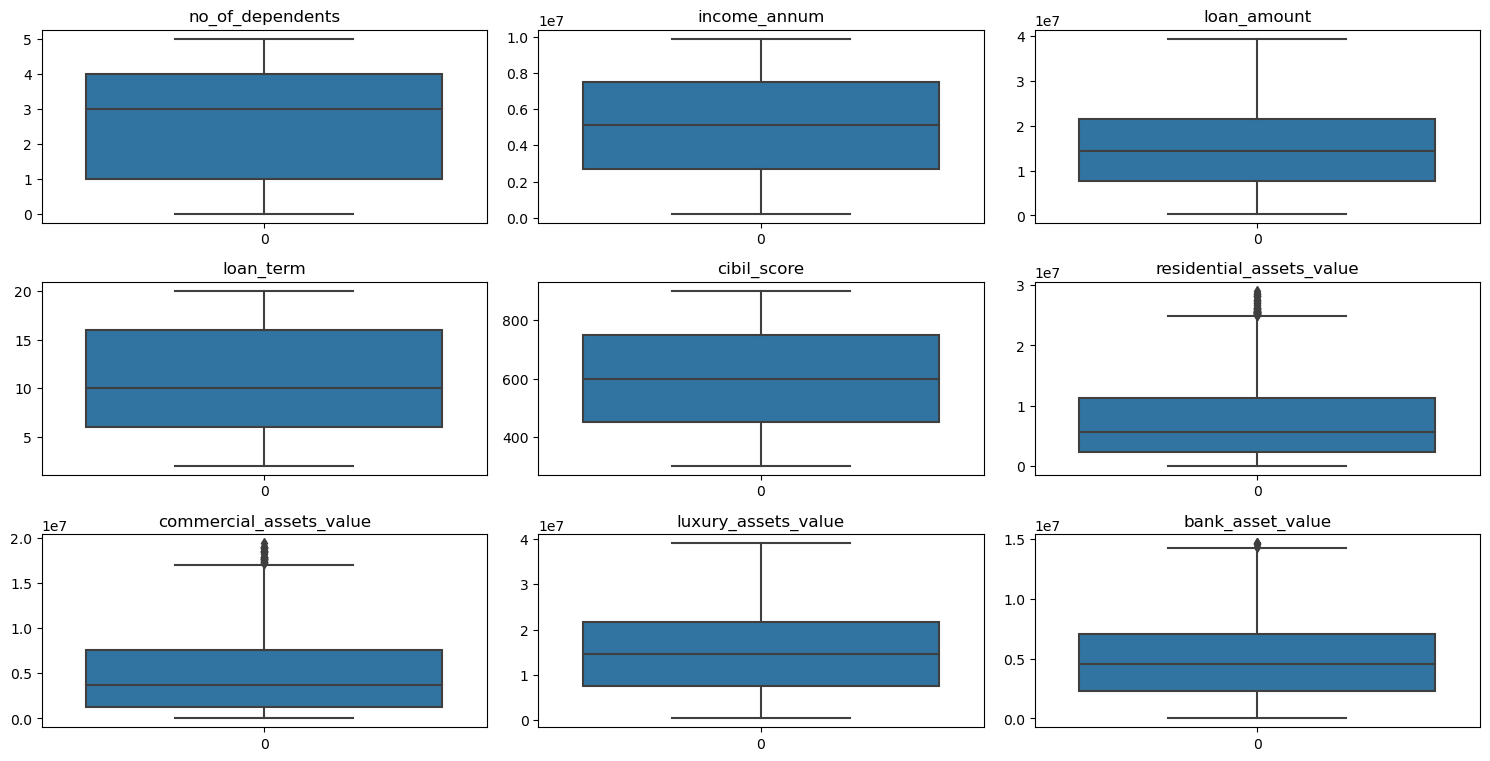

In [7]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [8]:
# Fix negative values first
num_cols = ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
data[num_cols] = data[num_cols].clip(lower=0)

# IQR-based capping
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data = cap_outliers(data, num_cols)

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['education', 'self_employed', 'loan_status']
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])
    
# Check encoding
data.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17050000.0,22700000.0,8000000.0,0
1,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1


In [10]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())



Feature shape: (4269, 11)
Target distribution:
 loan_status
0    2656
1    1613
Name: count, dtype: int64


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Scale features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("Balanced feature shape:", X_balanced.shape)
print("Balanced target distribution:\n", pd.Series(y_balanced).value_counts())


Balanced feature shape: (5312, 11)
Balanced target distribution:
 loan_status
0    2656
1    2656
Name: count, dtype: int64


cibil_score                 0.833840
loan_term                   0.057371
loan_amount                 0.025319
income_annum                0.015106
luxury_assets_value         0.014333
residential_assets_value    0.013728
bank_asset_value            0.012733
commercial_assets_value     0.012259
no_of_dependents            0.011125
self_employed               0.002318
education                   0.001869
dtype: float64


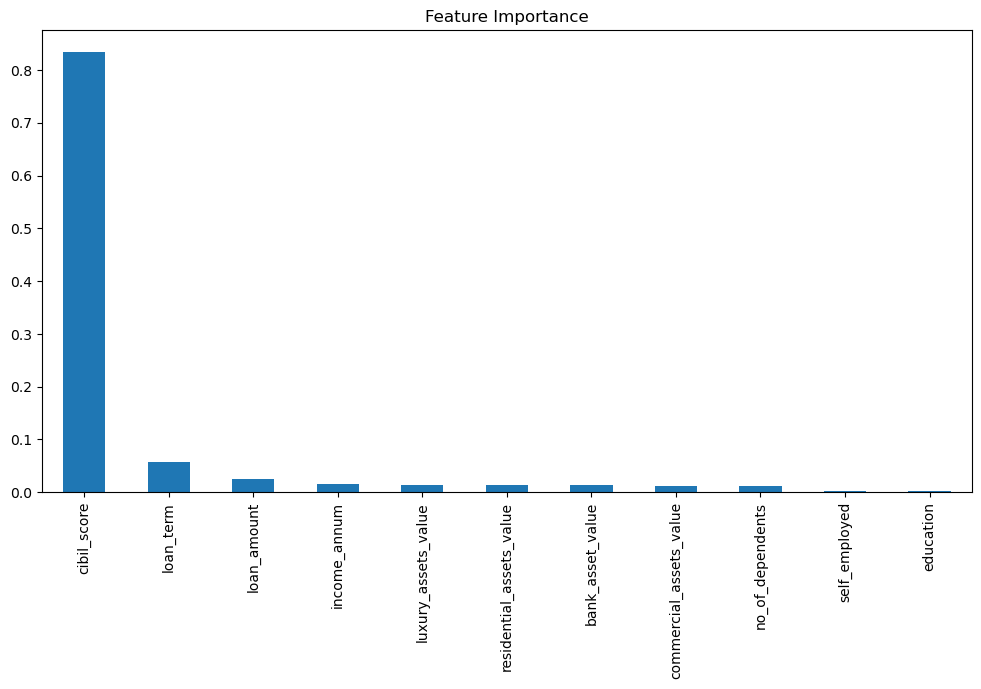

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest on your balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_balanced, y_balanced)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display
print(feat_importance)

# Plot
plt.figure(figsize=(12,6))
feat_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [25]:
selected_features = ['cibil_score',    'loan_term',    'loan_amount',    'income_annum',    'luxury_assets_value',
                'residential_assets_value',    'bank_asset_value',    'commercial_assets_value',    'no_of_dependents']
X_selected = pd.DataFrame(X_balanced, columns=X.columns)[selected_features]

In [26]:
X_selected

,cibil_score,loan_term,loan_amount,income_annum,luxury_assets_value,residential_assets_value,bank_asset_value,commercial_assets_value,no_of_dependents
0,1.032792,0.192617,1.633052,1.617979,0.832028,-0.783689,0.930707,2.770319,-0.294102
1,-1.061051,-0.508091,-0.324414,-0.341750,-0.694993,-0.737184,-0.515991,-0.633638,-1.473548
2,-0.544840,1.594031,1.610933,1.439822,1.996520,-0.055111,2.408185,-0.106426,0.295621
3,-0.771045,-0.508091,1.721525,1.119139,0.897943,1.665573,0.899926,-0.381493,0.295621
4,-1.264055,1.594031,1.002681,1.689242,1.568075,0.766477,0.007282,0.741698,1.475067
...,...,...,...,...,...,...,...,...,...
5307,-0.999168,-1.410621,0.242608,0.813562,0.640117,-0.032688,-0.193140,0.709801,1.225057
5308,-0.442148,0.839725,1.537563,1.527837,1.665349,2.626850,0.447977,-0.032270,-0.793607
5309,-1.471153,-1.208798,-1.442681,-1.580468,-1.434921,-1.101031,-1.462955,-1.094791,1.475067
5310,-1.380017,-0.111932,1.608627,0.996883,0.724034,-0.239431,-0.190672,0.416168,0.218521


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_selected, y_balanced, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Training shape:", y_train.shape)
print("Testing shape:", y_test.shape)


Training shape: (4249, 9)
Testing shape: (1063, 9)
Training shape: (4249,)
Testing shape: (1063,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("ROC AUC:", auc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)

--- Logistic Regression ---
Accuracy: 0.929444967074318
ROC AUC: 0.97128065278991
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       502
           1       0.93      0.94      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063

--------------------------------------------------
--- Decision Tree ---
Accuracy: 0.9774223894637818
ROC AUC: 0.9776668726164859
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       502
           1       0.98      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

--------------------------------------------------
--- Random Forest ---
Accuracy: 0.9

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,           # Number of random combinations to try
    scoring='roc_auc',   # Optimize for ROC AUC
    cv=5,                # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1            # Use all CPU cores
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\omalb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omalb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omalb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\omalb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    valid

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Best ROC AUC: 0.9984624240550334


In [30]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9811853245531514
Test ROC AUC: 0.9985938598546988
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       502
           1       0.99      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



In [31]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

final_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Train on full dataset
final_rf.fit(X_train, y_train)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}


RandomForestClassifier(max_depth=15, random_state=42)

In [32]:
y_pred = final_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9811853245531514
Test ROC AUC: 0.9985938598546988
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       502
           1       0.99      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


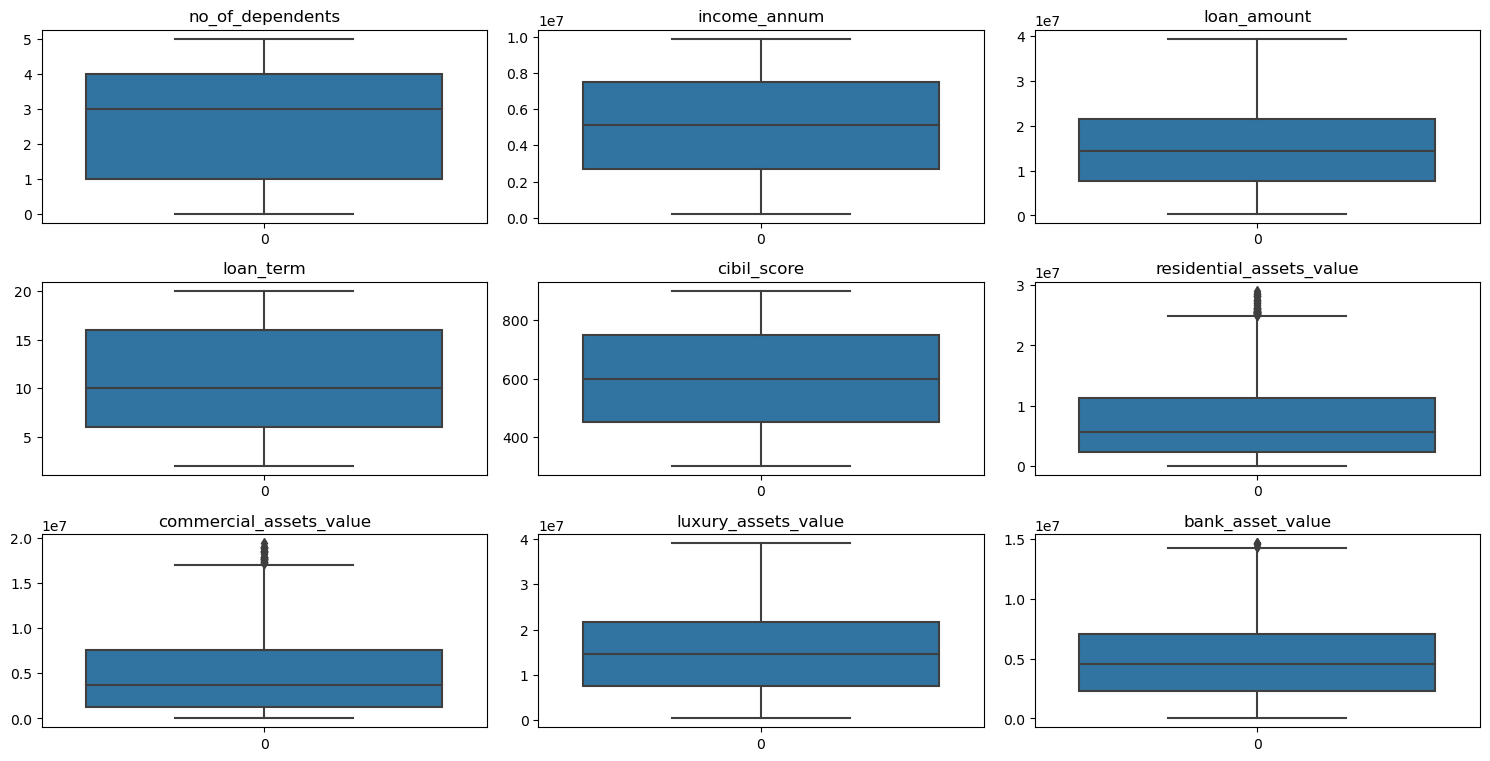

Feature shape: (4269, 11)
Target distribution:
 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('loan_approval_dataset.csv')
data = data.iloc[:,1:]
data

data.isna().sum()

data.info()

data.describe()

data.columns = data.columns.str.strip()

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()





# Fix negative values first
num_cols = ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
data[num_cols] = data[num_cols].clip(lower=0)

# IQR-based capping
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data = cap_outliers(data, num_cols)



X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())





from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Scale features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("Balanced feature shape:", X_balanced.shape)
print("Balanced target distribution:\n", pd.Series(y_balanced).value_counts())





from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest on your balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_balanced, y_balanced)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display
print(feat_importance)

# Plot
plt.figure(figsize=(12,6))
feat_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()







selected_features = ['cibil_score',    'loan_term',    'loan_amount',    'income_annum',    'luxury_assets_value',
                'residential_assets_value',    'bank_asset_value',    'commercial_assets_value',    'no_of_dependents']
X_selected = pd.DataFrame(X_balanced, columns=X.columns)[selected_features]



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_selected, y_balanced, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Training shape:", y_train.shape)
print("Testing shape:", y_test.shape)











from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,           # Number of random combinations to try
    scoring='roc_auc',   # Optimize for ROC AUC
    cv=5,                # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1            # Use all CPU cores
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC:", random_search.best_score_)






best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

